In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [77]:
from matplotlib import font_manager, rc
# matplotlib 에 맑은고딕 폰트 적용
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

### matplotlib 에서 한글 사용하기  
http://corazzon.github.io/matplotlib_font_setting

In [68]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list)) 

973


In [70]:
f = [f.name for f in font_manager.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

973


['DejaVu Serif',
 'DejaVu Sans',
 'cmb10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmr10',
 'STIXGeneral']

In [72]:
[(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'Malgun' in f.name]

[('Malgun Gothic', 'c:\\windows\\fonts\\malgun.ttf'),
 ('Malgun Gothic', 'c:\\windows\\fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'c:\\windows\\fonts\\malgunsl.ttf')]

In [78]:
# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
12.0
# 설정 되어있는 폰트 글꼴
['Malgun Gothic']


2.1 분류와 회귀  

2.2 일반화, 과대 적합, 과소 적합

일반화 = Generalization

모델이 처음보는 데이터에 대해 정확하게 예측 할 수 있으면 이를 훈련세트에서 테스트 세트로 일반화 되었다고 한다

과대 적합 = Overfitting

가진 정보를 모두 활용하여 너무 복잡한 모델을 만드는 것
모델이 훈련세트의 각 샘플과 너무 가깝게 맞춰져서 새로운 데이터에 일반화 하기가 어려울때

과소 적합 = Underfitting

너무 간단한 모델이 선택되는 것

(중요) 페이지 57 그림 2-1 모델 복잡도에 따른 훈련과 테스트 정확도 변화

2.2.1 모델 복잡도와 데이터셋 크기의 관계

데이터셋의 크기가 클 수록 과대적합 없이 더 복잡한 모델응 만들 수 있다.

데이터의 량을 과소평가 하지 마세요

2.3 지도 학습 알고리즘

2.3.1 예제에 사용할 데이터셋

두개의 특성을 가진 forge 데이터셋 = 인위적으로 만든 이진 분류 

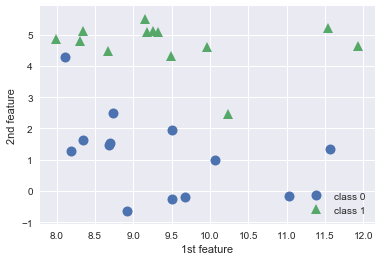

In [3]:
%matplotlib inline
import seaborn as sns
sns.set()
X, y = mglearn.datasets.make_forge()
# 산점도를 그리자
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('1st feature')
plt.ylabel('2nd feature');


In [4]:
X.shape

(26, 2)

회귀 알고리즘을 설명하는 데는 인위적으로 만든 wave 데이터셋을 상용하자

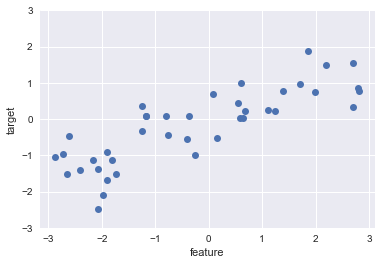

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('feature')
plt.ylabel('target');


In [6]:
X.shape

(40, 1)

위스콘신 유방암 임상 데이터셋

각 종양은 양성(benign)과 악성(malignant)로 되어 있고, 
조직 데이터를 기반으로 종양이 악성인지를 예측 할 수 있도록 학스을 하는 데이터임

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
cancer.data.shape

(569, 30)

In [9]:
cancer.target.shape

(569,)

In [10]:
print(cancer['DESCR'][:] + "\n...")

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [11]:
# 클래스별 샘플 갯수

{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

회귀 분석을 위해서는 보스턴 주택가격 데이터셋을 활용하자

범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용하여 1970년대 보스턴 주변의 주택 평균 가격을 에측하는 것

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()

In [14]:
print(boston['DESCR'][:] + "\n...")

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
boston.data.shape

(506, 13)

특성공학을 활용하여 13개의 입력 특성 뿐 아니라 특성끼리 곱하여 유도된 데이터 세트를 활용하자

In [16]:
# 13개를 2개씩 중복을 포함하여 짝지은 91개의 특성을 더해 총 104개의 특성이 만들어진 데이터 세트
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

2.3.2 k-최근접 이웃(k-NN = k-Nearest Neighbors)

가장 간단한 머신러인 알고리즘으로 훈련 데이터 세트를 저정하는 것이 모델을 만드는 과정의 전부임

새로운 데이터 포인트를 예측할때는 알고리즘이 훈련한 데이터셋에서 가장 가까운 데이터 포인트를 찾는다. 

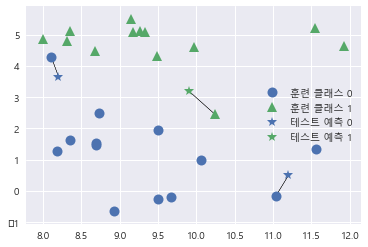

In [80]:
# forge 데이터세트 분류
# k가 1인 경우는 가장 가까운 데이터 포인트가 속한 분류로 표시됨 
mglearn.plots.plot_knn_classification(n_neighbors=1)

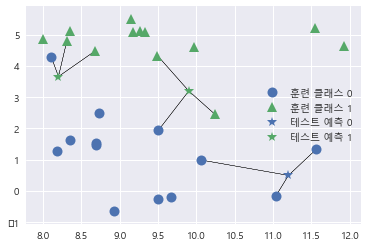

In [79]:
# k가 3인 경우는 레이블을 선택하기 위하여 투표를 한다.
# 가장 왼쪽 테스트 데이터는 k가 1일때와 다른 레이블로 분류 된다
mglearn.plots.plot_knn_classification(n_neighbors=3)

이제 Sci-kit Learn을 활용하여 k-NN을 어떻게 적용하는지 살펴보자

일반화 성능을 평가할 수 있도록 데이터를 훈련과 테스트 세트로 나누자

In [19]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_test.shape

(7, 2)

다음은 객체를 모델을 임포트하여 만들고 매개 변수를 3으로 지정하자 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

다음은 훈련 세트를 사용하여 분류 모델을학습시킨다. k-NN은 훈련데이터를 저장 시키는 것

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

테스트 데이터에 대해 predict()를 호출해서 예측하기

In [22]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

모델이 얼마나 잘 일반화 되었는지를 평가하기 위해 score()에 테스트 테이터와 테스트 레이블을 넣어 호출하자

In [23]:
clf.score(X_test, y_test)

0.8571428571428571

KNeighborsClassifier 분석하기

2차원 데이터셋이므로 가능한 모든 데이터를 평면에 그려 색을 칠해보자

결정 경계(decision boundary)를 볼 수 있는데... k가 1, 3, 9인 경우를 그려보자

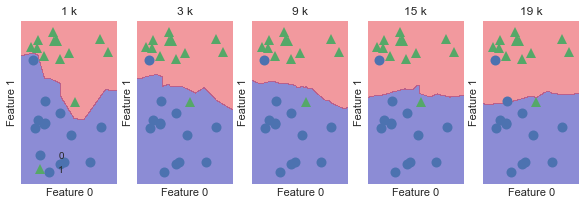

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9, 15, 19], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} k".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3);

위의 경우 이웃을 늘릴 수록 결정 경계는 더 부드러워 집니다 즉 더 단순한 모델을 만듭니다.

극단적인 경우 k의 수를 훈련데이터 전체의 갯수로 지정하는 경우 모든 테스트 포인트가 같은 이웃(모든 훈련데이터)을 가지게 됨으로 테스트 포인트에 대한 예측값은 모두 같은 값을 가지게 됨

즉 훈련세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측 값이 됨

유방암데이터를 활용하여 모델의 복잡도와 일반화 사이의 관계를 검증하여 보자

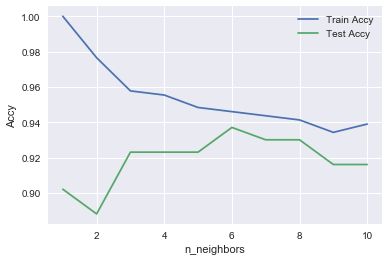

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# stratify : array-like or None (default is None)
# If not None, data is split in a stratified fashion, using this as the class labels.

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Train Accy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accy")
plt.ylabel("Accy")
plt.xlabel("n_neighbors")
plt.legend();

k-최근접 이웃 회귀

wave 데이터 셋을 이용하여 k-NN을 회귀 분석에도 활용해 보자

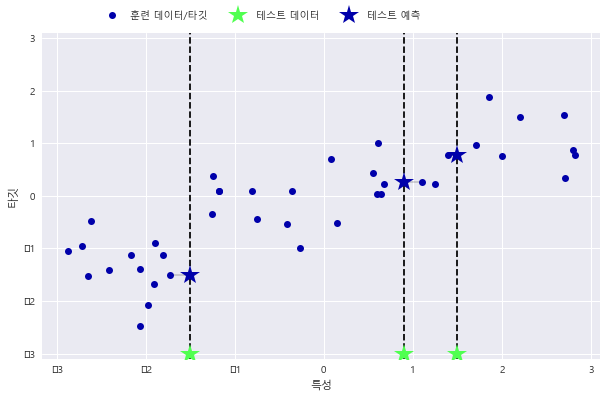

In [75]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

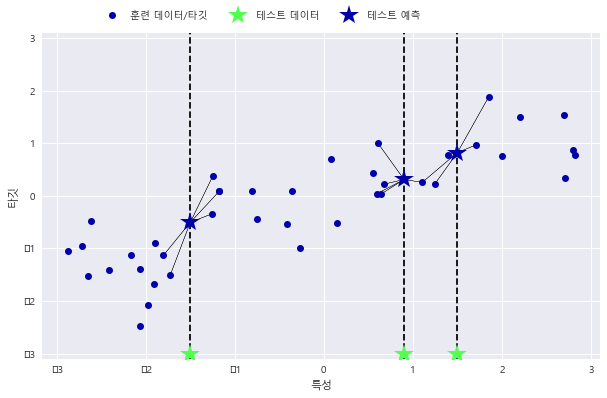

In [76]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

sci-kit learn 에서 회귀를 위한 k-NN알고리즘은 KNeighborsRegressor에 구현되어 있다

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [29]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

회귀 분석의 경우 score()를 사용하면 R^2(R의 제곱)값을 반환하는데, 결정 계수라 하고 회귀 모델에서 예측의 적합도를 0과 1사이의 값으로 계산한 결과 이다.

1은 완벽한 예측이고, 0은 훈련 세트의 출력값은 y_train의 평균으로만 예측하는 모델의 경우이다.

In [30]:
reg.score(X_test, y_test)

0.83441724462496036

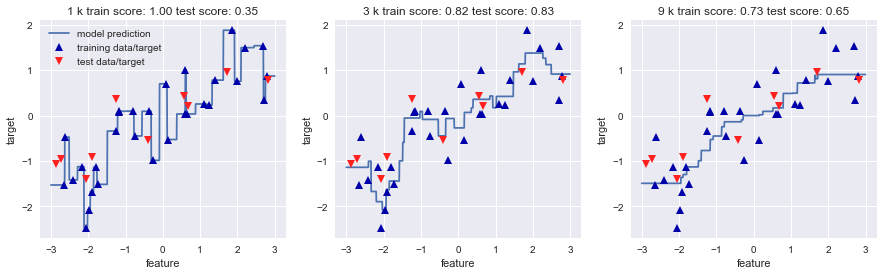

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} k train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model prediction", "training data/target", "test data/target"], loc="best");

k-NN은 쉽게 적용해 볼 수 있는 모델이지만,
데이터 전처리가 중요하고, 많은 특성을 가지고 있는 데이터셋에는 잘 동작하지 않으며,
특히 null값이 많은 데이터셋에서는 사용 불가임

2.3.3 선형 모델

회귀를 위한 선형 모델은 특성이 하나면 직선,
두개면 평면, 특성이 더 많으면 즉 높은 차원이면 초평면(hyperplane) 

w[0]: 0.393906  b: -0.031804


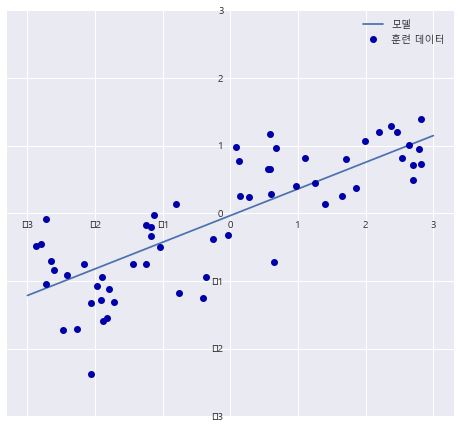

In [81]:
mglearn.plots.plot_linear_regression_wave()

타겟 y가 특성들의 선형 조합이라는 것은 매우 과한 때론 비현실적인 가정입니다.

그러나 1차원 데이터만 놓고 봐서 생긴 편견일 수도 있습니다. 특성이 많은 데이터셋이라면 선형 모델은 
매우 훌륭한 성능을 낼 수 있습니다.

특히 훈련데이터보다 특성이 더 많은 경우는 어떤 타겟 y도 완벽하게 선형함수로 모델링 할 수 있습니다

선형회귀 모델 1 - 선형회귀(최소제곱법) 

Linear Regression or Ordinary Least Square(OLS)

예측과 훈련세트에 있는 타겟 y 사이의 평균제곱오차(Mean Squared Error, MSE)를 최소화 하는 
파라미터 w와 b를 찾는 모델

MSE = 예측값과 타겟값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 값

매개 변수가 없는 것이 장점이나 이로 인해 모델의 복잡도를 제어할 방법도 없다

In [33]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

기울기 파라미터(w)는 가중치(weight) 혹은 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장 
각 입력 특성에 하나씩 대응되는 Numpy 배열이다

절편 파라미터(b)는 편향(offfset)혹은 절편(intercept)라고 하며 lr 객체의 intercept_ 속성에 저장
항상 실수(float)값을 가진다

뒷줄이 이상하게 보일 수 있으나 sci-kit learn에서는 훈련데이터에서 유도된 속성은 항상 끝에 밑줄을 붙이며, 이유는 사용자가 지정한 매개변수와 구분하기 위함이다.

In [34]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.03180434302675973


In [35]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


R^2 값이 그리 좋지않고 훈련세트나 테스트세트의 점수가 매우 비슷한 것으로 보아 이는 과소 적합임을 알수 있다

1차원 모델에서는 모델이 단순하므로 과대적합을 걱정할 경우는 거의 없으며 
고차원 데이터 세트의 경우는 선형 모델의 성능이 매우 높아 과대적합이 되는 경우가 많음 

보스톤 확장 모델 살펴보기

In [36]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [37]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


위는 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 합니다.

규제(regularization)은 과대적합이 되지 않도록 모델응 강제로 제한하는 것

릿지 회귀(Ridge Regression) = L2 규제를 가진 선형회귀

예측 함수는 최소적합법에서 사용한 것과 동일 즉 규제(가중치의 합을 최소화함, L2)를 가진 선형 함수임

그러나 릿지회귀에서는 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위한 목적 뿐 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음. 

가중치의 절대값을 가능한 한 작게 만드는 것.
즉, w의 모든 원소가 0에 가깝게 되도록 한다(기울기를 작게 만든다)
즉, 이는 모든 특성이 출력에 주는 영향을 최소한으로 만드는 방법


In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


결과를 보니 훈련세트의 점수는 lr 보다는 낮지만 테스트데이터에 대한 점수는 lr 보다는 높다.
즉 과대 적합이 줄어 들었다

관심이 있는 것은 테스트 데이터 세트에 대한 점수 이므로 여기서는 Ridge()를 선택 하여야 한다.

Ridge()의 주요 매개변수 alpha:

기본 값은 alpha=1.0.으로 위의 예제는 alpha를 1.0으로 한 모델의 결과임
alpha 값을 높이면 기울기를 더욱 0에 가깝도록 한다는 의미이고,
alpha 값이 0에 가까워지면 거의 LinearRegression에 가까워 진다.

In [39]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [40]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


여기서는 alpha값이 0.1일 경우 데스트 세트의 점수가 가장 좋게 나타남을 알 수 있다
그림 2-1을 참조하여 모델 복잡도에 따른 훈련과데스트의 정확도의 변화를 관계를 다시 한번 생각해 보자

alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지 살펴 보자. 

alpha 매개 변수가 모델을 어떻게 변화 시키는지 알아 볼 수 있다

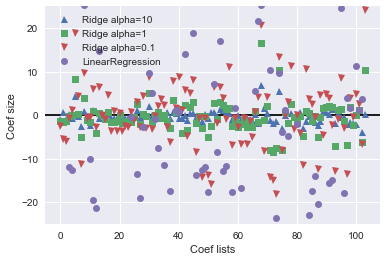

In [41]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coef lists")
plt.ylabel("Coef size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

x축은 계수의 원소를 위치대로 나열한 것, 
즉 x=0는 첫번째 특성에 연관된 계수, x=1은 두번째 특성에 연관된 계수 등등 이렇게 x=100까지

y축은 각 계수의 수치를 나타냄,
결과적으로 alpha=10일때는 대부분의 계수가 -3과 3사이
alpha=1.0일때는 Ridge 모델의 계수가 좀 더 커졌고,
alpha=0.1일때는 더 커지며,
alpha=0 즉 선형회귀일 때는 계수의 값이 더 커져 그림 밖으로 넘어감


(중요) 학습곡선 = Learning Curve = 데이터셋 크기에 따른 모델의 성능 변화

규제(regularization)의 효과를 이해하기 위해 alpha값을 고정하고 훈련데이터의 크기를 변화 시켜 보자

아래의 그림은 보스톤 세트에서 여러가지 크기로 데이터를 샘플링하여 LinearRegression과 Ridge(alpha=1.0)을 적용한 결과 그래프임

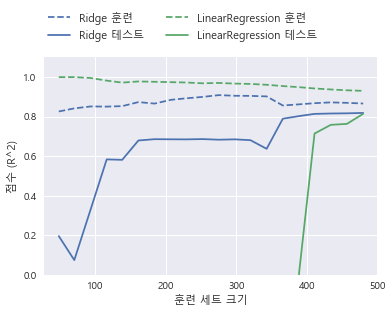

In [82]:
mglearn.plots.plot_ridge_n_samples()

선형 릿지 모두 훈련 세트의 점수가 테스트 세트보다 높다

릿지에는 규제가 적용됨으로 테스트 세트의 점수는 테이터 사이즈가 커지기 전에는 릿지가 더 높다
(테스트 데이터 세트가 400이하면 LinearRegression은 어떤 것도 학습을 못하고 있다)

두 모델의 성능은 데이터의 수가 많아 질 수록 좋아지며 마지막에는 LinearRegression이 Ridge를 따라 잡는다
(데이터가 충분히 주어지면 규제가 덜 중요해 지므로 성능이 같아진다)

또 하나 흥미로운 점은 데이터 수가 많아 질 수록 LinearRegression의 훈련데이터 성능이 떨어진다는 점
(데이터가 많아지면 기억력이 떨어진다 즉 과대적합하기 어려워진다)

라쏘 회귀(Lasso Regression) = L1 규제

Ridge 회귀와 유사하게 계수를 0에 가깝도록 만든는데...
어떤 계수는 정말 0이 되도록 하여 특성 선택(feature selection)이 자동적으로 만들어 지도록 하는것

일부 계수를 0으로 만들면 모델을 이해하기가 쉬워 지며 이 모델의 가장 중요한 특성이 무엇인지 알려준다  

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


결과가 모두 좋지 않은데... 이는 과소적합으로 104개 중 4개만 사용한 것을 알 수 있다.

Rasso도 계수를 얼마나 강하게 0으로 보낼 지는 alpha 매개 변수를 사용하고, 여기서는 alpha=1.0을 기본값으로

과소 적합을 줄이기 위해 alpha값을 줄이고 이를 위해서는 max_iter(반복실행하는 최대 횟수)의 기본값은 늘려 보도록 하겠습니다.

In [44]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


alpha 값을 낮추면 모델의 복잡도는 증가하여 성능은 좋아지는데...
Ridge 보다 아주 좋지는 않지만 사용된 특성이 104개 중 33개여서 아마도 모델을 분석하는데는 도움이 됨.

그러나 alpha값을 너무 낮추면 규제의 효과가 거의 사라져 과대 적합 됨으로 LinearRegression과 성능이 유사해짐

In [45]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


alpha 값이 다른 모델들의 계수 그림으로 확인하기

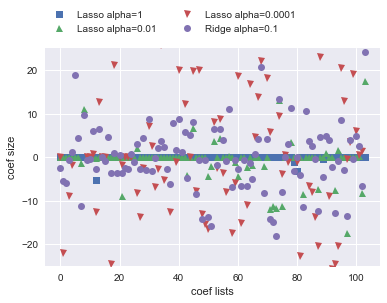

In [46]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef lists")
plt.ylabel("coef size");

alpha = 1.0 인경우 계수 대부분이 0이고 나머지도 0에 가까운 값으로 나타남.
alpha = 0.01 인 경우는 상당 부분이 0이고 나머지도 10을 잘 넘지 않는다
alpha = 0.001 인 경우 대부분이 0이 아니고 값도 상당히 커짐

릿지를 원 모양으로 나타냈는데... Lasso(alpha=0.01)와 비슷하지만 계수가 0이 되는 경우는 없다

보통은 Ridge 즉 L2 규제를 많이 쓰지만 예측에 사용되는 특성의 수를 줄이고 싶다면 Rasso 즉 L1 구제를 사용한다

ElasticNet = L2와 L1의 패널티를 결합한 형태 = 통상 좋은 결과를 가져 온다

분류용 선형모델 -- 여기서는 binary classification 부터 살펴 보자

예측 방정식 

y^ = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b > 0

이 방정식은 선형회귀와 비슷하나 특성들의 가중치의 합을 그냥 사용하는 것이 아니라 예측한 값을 임계치 0 과 비교

함수에서 계산한 값이 0 보다 작으면 클래스를 -1로 예측하고
0 보다 크면 +1로 예측하는 것으로 분류에 사용하는 모든 선형 모델에 동일하게 적용된다.
결정 경계(decision boundary)가 선형 함수 인 분류 모델

여기서도 w 와 b를 찾아야 한다

선형 모델을 학습 시키는 알고리즘은 다양한데, 다음의 두가지로 구분 할 수 있다.

(1) 특정 계수와 절편의 조합이 훈련데이터에 얼마나 잘 맞는지 측정하는 방법(손실함수)
(2) 사용할 수 있는 규제가 있는지, 있다면 방식은 무엇인지?

(중요) 분류용 선형 모델에서는 w와 b를 조정하여 잘못된 분류의 수를 최소화하는 것은 불가 하다.

분류에서 잘못된 결과를 직접 나타내는 0-1 손실함수는 완전히 계단 함수이므로 따라서 대리할 수 있는 다른 함수를 사용하여 최적활를 수행 하여야만 한다. surrogate loss function

로지스틱 회귀(Logistic Regression) = 분류 알고리즘

이진 분류에서는 로지스틱 손실함수 즉 시그모이드 함수를 사용하고
다중 분류에서는 교차 엔트로피(cross-entrophy) 손실함수를 사용한다

서포트 벡터 머신(Support Vector Machine)

기본적으로는 제곱 힌지(squared hinge) 손실 함수를 사용한다

forge 데이터셋을 이용하여 LogisticRegression 과 LinearSVC 모델을 만들고 결정 경계를 그림으로 만들자

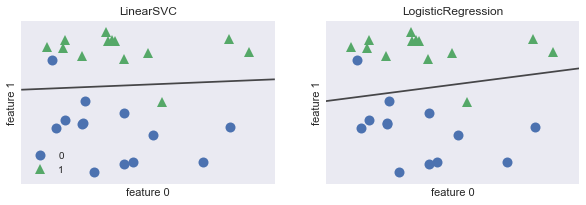

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend();

결정 경계가 직선으로 표시 되었고, 위쪽이 클래스 1 으로 아랫쪽을 클래스 0 으로 나누고 있음

즉, 새로운 데이터가 결정 경계 위쪽에오면 클래스 1 로 아랫쪽에 오면 클래스 0 으로 분류됨

두 모델 모두 L2 규제(Ridge 규제)를 사용합니다.

규제의 강도는 C 라는 매개 변수를 사용합니다.
C 가 크면 최대한 훈련데이터 세트를 반영하려 하는 것이며,
C 가 작으면 계수 벡터 w를 0 에 가깝도록 만드는 것 입니다.

LinearSVC에 C(L2 규제)를 적용한 예를 그림으로 알아 보자

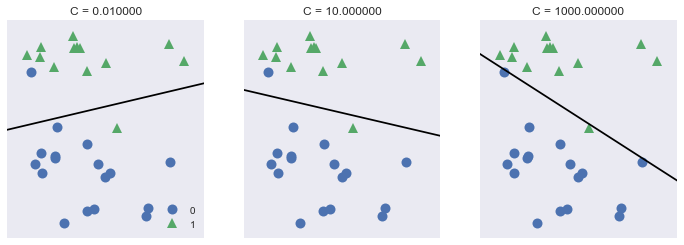

In [48]:
mglearn.plots.plot_linear_svc_regularization()

첫번째 그래프는 규제가 많이 이루어져 비교적 수평에 가까운 결정 경계를 만들었고 잘못 분류된 데이터 포인트는 2개
두번째 그래프는 C값이 조금 크며 잘못 분류된 두 샘플에 조금 더 반응을 보이며 기울기가 기울어 졌음
세번째 그래프는 C값을 아주 크게 한 경우로 마침내 클래스 0 의 모든 데이터 포인트를 올바로 분류 하였으나 과대 적합된 것으로 보인다.

유방암 데이터세트를 활용하여 고차원에서 활용되는 경우를 살펴 보자

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


기본값 C=1이 꽤 높은 성능을 보이고 있는데... 성능이 매우 비슷해 과소 적합으로 보입니다.

C 를 증가 시켜 보겠습니다.

In [50]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


C=100을 사용하니 훈련 세트의 성능도 올라가고 테스트 세트의 성능도 올라가 복잡도가 높으면 모델 성능이 좋아진다

In [51]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


C=0.01을 적용하였더니 과소적합이 더 심해짐을 확인 할 수 있다

그래프로 C 설정을 3가지로 하였을 때 학습시킨 모델의 계수를 확인해 보자

In [52]:
cancer.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [53]:
cancer.data.shape

(569, 30)

In [54]:
cancer.data.shape[1]

30

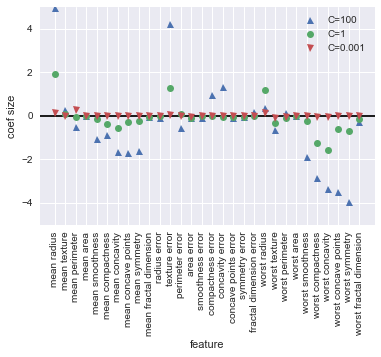

In [55]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend();

(Note) LogisticRegression은 기본적으로 L2 규제를 적용하므로 Ridge와 비슷한 모양을 가집니다.(규제를 강하게 할 수록 0에 가까와 지지만 완전히 0이 되지는 않음)

세번째 계수(mean paramter)를 살펴 보면, C=100, C=1일 때는 음수 이지만, C=0.001일때는 양수이며, C=1 때 보다도 절대값이 더 큽니다. == 이는 양성과 악성 모두의 신호가 될 수 있다는 의미임

Texture Error 특성의 경우는 악성 클래스의 샘플과 관련이 깊습니다.

선형 모델의 계수는 주의 깊은 분석을 요합니다.


L1 규제를 동시에 활용한 이해하기 쉬운 모델 만들어 학습하기

모델 특성 몇 개만 사용하여 분석하기 == penalty 매개변수 L1 

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


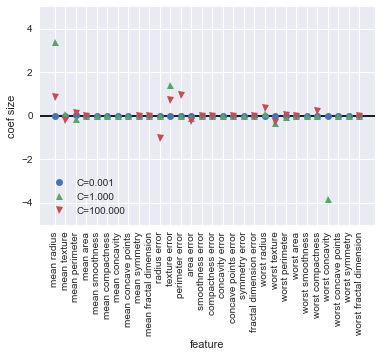

In [56]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3);

다중 클래스 분류용 선형 모델

로지스틱 회귀는 소프트맥스를 이용한 다중 분류 알고리즘을 제공하지만 다른 선형 분류 모델은 없음

==> 일대다 기법으로 확장하여 사용한다.

일대다 방식은 각 클래스를 다른 모든 클래스와 구분 하도록 이진 부류 모델을 학습시키고, 결국 클래수의 수 만큼 이진 부류 모델을 만들어 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스 값을 선택 하도록 하는 방식을 취한다.

클래스마다 계수 벡터와 절편이 존재 한다

세개의 클래스를 가진 예를 들어보자

이 데이터세트는 2차원이며 각 클래스는 정규분포(가우시안 분포)를 따른다 가정하자

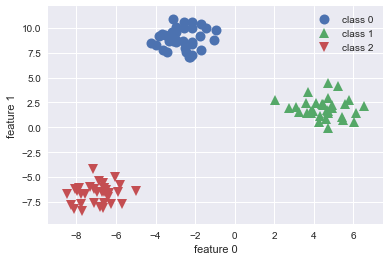

In [57]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"]);

LinearSVC 모델을 적용해 보자

In [58]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [59]:
linear_svm.coef_

array([[-0.17492717,  0.23141059],
       [ 0.47621633, -0.06936484],
       [-0.18914304, -0.20399603]])

In [60]:
linear_svm.coef_[0]

array([-0.17492717,  0.23141059])

In [61]:
linear_svm.coef_[1]

array([ 0.47621633, -0.06936484])

In [62]:
linear_svm.intercept_

array([-1.07745609,  0.13140995, -0.08604814])

coef의 배열의 크기는 2차원 (3,2) 이며 클래스가 행 특성이 열
intercept는 각 클래스의 절편을 담은 1차원 벡터임 ???

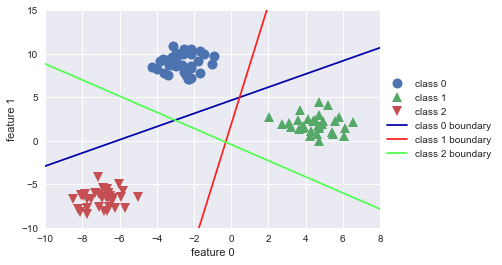

In [63]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3));

여기서 삼각형 영역이 문제인데 이는 결정 경계를 그려 해결하자

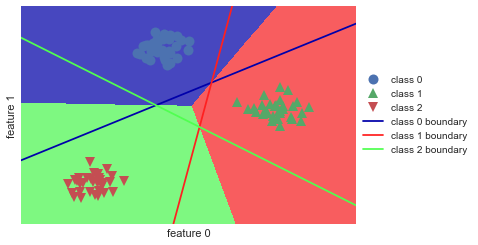

In [64]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3));

종합 정리 - 선형 모델

(1) 매개 변수
- 선형 모델의 주요 매개 변수는 alpha 였고, LinearSVC와 LogisticRegression에서는 C
- alpha 값이 클수록 C값이 작을 수록 모델은 단순해 진다.
- 매개 변수 조정은 회귀 분석에서 매우 중요하다
- 보통은 로그 스케일로 최적치를 정합니다.(예) 0.01, 0.1, 1, 10, 100 등

(2) 그리고 L1 규제도 사용할 지 정해야 합니다.
- 보통의 경우는 L2 규제만 사용을 하지만 L1 규제를 사용하여 몇가지 특성만으로 해당 모델을 설명할 수 있음
- 모델의 해석이 중요하면 L1 규제 사용하면 좋다

(3) solver='sag' 옵션을 사용하면 LogisticRegression과 Ridge에서 대용량 샘플을 처리 할 수 있다
- sag = Stochastic Average Gradient descent(확률적 경사 하강법) 
- 경사 하강법과 유사하지만 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용하여 계수를 갱신한다.
- 다른 대안 으로는 모델 선택을 SDGClassifier 와 SGDRegressor 로 하여 대용량 처리도 가능함
- SGD = Stochastic Gradient Descent(확률적 경사 하강법)

(4) 단점은 계수의 값들이 명확하지 않은 경우들이 많은데.... 
- 특히 특성들이 서로 연관되어 있으면 이러한 경향이 더욱 많이 나타난다.

(5) 선형 모델은 샘플의 수에 비해 특성들이 많을 때 잘 작동합니다
- 고차원 모델이 더욱 적합함

2.3.4 나이브 베이즈 분류기

